
# Styling

Panel objects build on [param](https://param.holoviz.org/), which allows them to be specified by parameters so that users can flexibly edit to control the output displayed. In addition to the parameters specific to each component and component class, all components define a common set of parameters to control the size and style of the rendered view.

In [1]:
import panel as pn


pn.extension()

## Styling components

### `css_classes`

The `css_classes` parameter enables a panel component to be assigned to one or more CSS classes. CSS can be specified directly in the notebook or as a reference to an external CSS file by passing it to the Panel extension with `raw_css` or `css_files` as a list. Outside a notebook, in an external module or library, we can attach configuration parameters with `pn.config.raw_css` and `pn.config.js_files`.

To demonstrate this usage, let’s define a CSS class named `widget-box`:

In [2]:
css = """
.widget-box {
  background: #f0f0f0;
  border-radius: 5px;
  border: 1px black solid;
}
"""

pn.extension(raw_css=[css])

In [3]:
pn.Column(
    pn.widgets.FloatSlider(name="Quantity", margin=(20, 26, 6, 26)),
    pn.widgets.Select(
        name="Fruit",
        options=["Apple", "Pear", "Orange"],
        margin=(10, 26, 6, 26),
    ),
    pn.widgets.Button(name="Run", margin=(34, 26, 20, 26)),
    css_classes=["widget-box"],
)

Column(css_classes=['widget-box'])
    [0] FloatSlider(margin=(20, 26, 6, 26), name='Quantity')
    [1] Select(margin=(10, 26, 6, 26), name='Fruit', options=['Apple', 'Pear', ...], value='Apple')
    [2] Button(margin=(34, 26, 20, 26), name='Run')

### `background`

If we just want to give the component a background, we can define one as a hex string:

In [4]:
pn.Column(styles={"background": "#f0f0f0", "width": "100", "height": "100"})

Column(styles={'background': '#f0f0f0', ...})

### `style`

Certain components, especially markup-related panes, provide a `style` parameter that can be used to define CSS styles that are applied to the HTML container of the window content, e.g. the `Markdown`  pane:

In [5]:
pn.pane.Markdown("### Cusy: DevOps", styles={"font-family": "sans-serif"})

Markdown(str, styles={'font-family': '...})

## Component size and layout

The size of the components and their spacing are also controlled by a number of parameters that are shared by all components.

### `margin`

The `margin` parameter can be used to create space around an element, which is defined as the number of pixels in the order top, right, bottom and left, e.g.

In [6]:
pn.Row(
    pn.Column(
        pn.widgets.Button(name="Selector", margin=(20, 16, 20, 26)),
        styles={"background": "#f0f0f0"},
    ),
    pn.Column(
        pn.widgets.Button(name="Widget", margin=(20, 16, 20, 0)),
        styles={"background": "#f0f0f0"},
    ),
    pn.Column(
        pn.widgets.Button(name="Description", margin=(20, 26, 20, 0)),
        styles={"background": "#f0f0f0"},
    ),
)

Row
    [0] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 16, 20, 26), name='Selector')
    [1] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 16, 20, 0), name='Widget')
    [2] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 26, 20, 0), name='Description')

### Absolute dimensioning with `width` and `height`

By default, all components use either automatic or absolute resizing. Panels generally take up as much space as the components they contain, and text- or image-based panels adjust to the size of their content. To set a fixed size for a component, it is usually sufficient to set a width or height. In certain cases, however, `sizing_mode='fixed'` must be specified explicitly.

Row
    [0] Markdown(str, styles={'color': 'white', ...})
    [1] GIF(str, width=100)
    [2] FloatSlider(width=100)
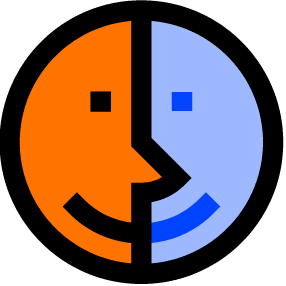

In [7]:
pn.Row(
    pn.pane.Markdown(
        "\>CUSY_",
        styles={
            "color": "white",
            "font-weight": "300",
            "background": "black",
            "width": "100px",
            "height": "100px",
            "padding": "10px",
        },
    ),
    pn.pane.GIF("../../ipywidgets/smiley.gif", width=100),
    pn.widgets.FloatSlider(width=100),
)

### `sizing_mode` 

`sizing_mode` can have the following values:

* `fixed`: The component is not responsive. The original width and height are retained regardless of subsequent events that resize the browser window. This is the default behavior and just uses the specified width and height.
* `stretch_width`: The component resizes to stretch it to the available width without maintaining the aspect ratio. The height of the component depends on the type of component and can be fixed or tied to the content of the component.
* `stretch_height`: The component is resized appropriately to fit the available height, but without maintaining the aspect ratio. The width of the component depends on the type of component and can be fixed or tied to the content of the component. 
* `stretch_both`: The component is responsive, regardless of width or height, and occupies all available horizontal and vertical space, even if this changes the aspect ratio of the component.
* `scale_height`: The component is resized appropriately to stretch it to the available height while maintaining the original or provided aspect ratio.
* `scale_width`: The component is resized appropriately to stretch it to the available width while maintaining the original or provided aspect ratio.
* `scale_both`: The component is resized to the available width and height, while maintaining the original or provided aspect ratio.

In [8]:
pn.pane.Str(
    styles={
        "background": "#f0f0f0",
        "height": "100",
        "sizing_mode": "stretch_width",
    }
)

Str(None, styles={'background': '#f0f0f0', ...})

In [9]:
pn.Column(
    pn.pane.Str(
        styles={
            "background": "#f0f0f0",
            "sizing_mode": "stretch_height",
        }
    ),
    height=100,
)

Column(height=100)
    [0] Str(None, styles={'background': '#f0f0f0', ...})

In [10]:
pn.Column(
    pn.pane.Str(
        styles={
            'background': '#f0f0f0',
            'sizing_mode': 'stretch_both',
        }
    ),
    height=100
)

Column(height=100)
    [0] Str(None, styles={'background': '#f0f0f0', ...})

Column(styles={'background': '#f0f0f0'})
    [0] GIF(str, sizing_mode='scale_both')
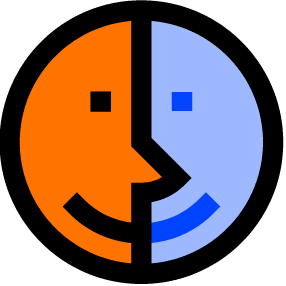

In [11]:
pn.Column(
    pn.pane.GIF("../../ipywidgets/smiley.gif", sizing_mode="scale_both"),
    styles={"background": "#f0f0f0"},
)

### `Spacer`

`Spacer` are a very versatile component that can be used to easily create fixed or responsive distances between objects. Like all other components `Spacer` support both absolute and responsive mode:

In [12]:
pn.Row(
    1,
    pn.Spacer(width=200),
    2,
    pn.Spacer(width=100),
    3,
    pn.Spacer(width=50),
    4,
    pn.Spacer(width=25),
    5,
)

Row
    [0] Str(int)
    [1] Spacer(width=200)
    [2] Str(int)
    [3] Spacer(width=100)
    [4] Str(int)
    [5] Spacer(width=50)
    [6] Str(int)
    [7] Spacer(width=25)
    [8] Str(int)

`VSpacer` and `HSpacer` ensure an attractive vertical or horizontal distance. With these components we can place objects equidistantly on a layout and shrink the empty area when the browser is resized:

In [13]:
pn.Row(
    "* Item 1\n* Item2",
    pn.layout.HSpacer(),
    "1. First\n2. Second",
    pn.layout.HSpacer(),
)

Row
    [0] Markdown(str)
    [1] HSpacer()
    [2] Markdown(str)
    [3] HSpacer()